Observations:
1. Capomulin and Ramicane were the only drugs that caused the tumor size to decreate over the 45 day period.
2. The mice that were on Capomulin and Ramicane had the highest suvival rates, compared to the mice on the other drugs.
3. Mice that were on Zoniferol had the largest number of metastic sites at the end of the 45 day period.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load in clinical trial csv
csv_path1 ="clinicaltrial_data.csv"
clinical_trial_df = pd.read_csv(csv_path1)
clinical_trial_df .head()

#Load in mouse trial data
csv_path2 ="mouse_drug_data.csv"
mouse_df = pd.read_csv(csv_path2)
mouse_df.head()



,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# inner merging data on mouse ID
combo_data_df=pd.merge(clinical_trial_df,mouse_df, on="Mouse ID")
combo_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#creating array of all the drug names to use later for a for loop
medicine_array = combo_data_df["Drug"].unique()

In [5]:
#grouping by drug and timepoint
grouped =combo_data_df.groupby(["Drug", "Timepoint"])

time_drug_mean_df= pd.DataFrame(grouped["Tumor Volume (mm3)"].mean())



In [6]:
time_drug_mean_df.loc['Capomulin',:].values

array([[ 45.        ],
       [ 44.26608642],
       [ 43.08429058],
       [ 42.06431735],
       [ 40.71632532],
       [ 39.93952783],
       [ 38.76933929],
       [ 37.81683888],
       [ 36.95800081],
       [ 36.2361138 ]])

In [6]:
time_drug_mean_df.index

MultiIndex(levels=[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=['Drug', 'Timepoint'])

[array([[ 45.        ],
       [ 44.26608642],
       [ 43.08429058],
       [ 42.06431735],
       [ 40.71632532],
       [ 39.93952783],
       [ 38.76933929],
       [ 37.81683888],
       [ 36.95800081],
       [ 36.2361138 ]]), array([[ 45.        ],
       [ 47.38917452],
       [ 49.58226897],
       [ 52.39997374],
       [ 54.92093474],
       [ 57.67898172],
       [ 60.99450719],
       [ 63.37168605],
       [ 66.06858035],
       [ 70.66295761]]), array([[ 45.        ],
       [ 46.7960981 ],
       [ 48.6942096 ],
       [ 50.93301828],
       [ 53.64408744],
       [ 56.73196758],
       [ 59.55950856],
       [ 62.68508695],
       [ 65.60075374],
       [ 69.26550621]]), array([[ 45.        ],
       [ 47.06200103],
       [ 49.40390857],
       [ 51.29639656],
       [ 53.19769093],
       [ 55.71525236],
       [ 58.29939721],
       [ 60.74246123],
       [ 63.16282442],
       [ 65.75556228]]), array([[ 45.        ],
       [ 47.52745167],
       [ 49.46384376],
  

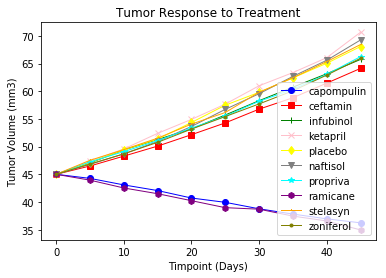

In [16]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

#creating pandas series for with tumor size information for each drug
capompulin = time_drug_mean_df.loc['Capomulin',:].values
ceftamin =time_drug_mean_df.loc['Ceftamin',:].values
infubinol =time_drug_mean_df.loc['Infubinol',:].values
ketapril =time_drug_mean_df.loc['Ketapril',:].values
naftisol =time_drug_mean_df.loc['Naftisol',:].values
placebo =time_drug_mean_df.loc['Placebo',:].values
propriva=time_drug_mean_df.loc['Propriva',:].values
ramicane=time_drug_mean_df.loc['Ramicane',:].values
stelasyn=time_drug_mean_df.loc['Stelasyn',:].values
zoniferol=time_drug_mean_df.loc['Zoniferol',:].values

tumor_size=[]
for medicine in medicine_array:
    size=time_drug_mean_df.loc[medicine,:].values
    tumor_size.append(size)
print(tumor_size)
    

    


#creating x-axis 
x_axis=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


#plotting drugs on line chart
plt.plot(x_axis, capompulin, linewidth=1, marker="o", color="blue", label="capompulin" )
plt.plot(x_axis, ceftamin, linewidth=1, marker="s", color="red" , label="ceftamin")
plt.plot(x_axis, infubinol, linewidth=1, marker="+", color="green" , label="infubinol")
plt.plot(x_axis, ketapril, linewidth=1, marker="x", color="pink" , label="ketapril")
plt.plot(x_axis, placebo, linewidth=1, marker="d", color="yellow", label="placebo")
plt.plot(x_axis, naftisol, linewidth=1, marker="v", color="gray" , label="naftisol")
plt.plot(x_axis, propriva, linewidth=1, marker="*", color="cyan",label="propriva" )
plt.plot(x_axis, ramicane, linewidth=1, marker="h", color="purple" ,label="ramicane")
plt.plot(x_axis, stelasyn, linewidth=1, marker=",", color="orange" ,label="stelasyn")
plt.plot(x_axis, zoniferol, linewidth=1, marker=".", color="olive" ,label="zoniferol")

plt.xlabel("Timpoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

plt.legend(loc="best")

plt.show()

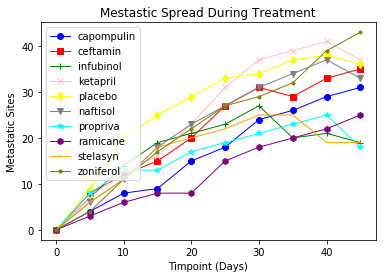

In [8]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
grouped.head()
tumor_count=pd.DataFrame(grouped["Metastatic Sites"].sum())
tumor_count

#creating pandas series for with tumor size information for each drug
capompulin_count = tumor_count.loc['Capomulin',:].values
ceftamin_count =tumor_count.loc['Ceftamin',:].values
infubinol_count =tumor_count.loc['Infubinol',:].values
ketapril_count =tumor_count.loc['Ketapril',:].values
naftisol_count =tumor_count.loc['Naftisol',:].values
placebo_count =tumor_count.loc['Placebo',:].values
propriva_count=tumor_count.loc['Propriva',:].values
ramicane_count=tumor_count.loc['Ramicane',:].values
stelasyn_count=tumor_count.loc['Stelasyn',:].values
zoniferol_count=tumor_count.loc['Zoniferol',:].values

#creating x-axis

#fining the max number of metastic sites
max_tumor = tumor_count.max()


#ploting info on line chart
plt.plot(x_axis, capompulin_count, linewidth=1, marker="o", color="blue", label="capompulin" )
plt.plot(x_axis, ceftamin_count, linewidth=1, marker="s", color="red" , label="ceftamin")
plt.plot(x_axis, infubinol_count, linewidth=1, marker="+", color="green" , label="infubinol")
plt.plot(x_axis, ketapril_count, linewidth=1, marker="x", color="pink" , label="ketapril")
plt.plot(x_axis, placebo_count, linewidth=1, marker="d", color="yellow", label="placebo")
plt.plot(x_axis, naftisol_count, linewidth=1, marker="v", color="gray" , label="naftisol")
plt.plot(x_axis, propriva_count, linewidth=1, marker="*", color="cyan",label="propriva" )
plt.plot(x_axis, ramicane_count, linewidth=1, marker="h", color="purple" ,label="ramicane")
plt.plot(x_axis, stelasyn_count, linewidth=1, marker=",", color="orange" ,label="stelasyn")
plt.plot(x_axis, zoniferol_count, linewidth=1, marker=".", color="olive" ,label="zoniferol")

plt.xlabel("Timpoint (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Mestastic Spread During Treatment")

plt.legend(loc="best")

plt.show()


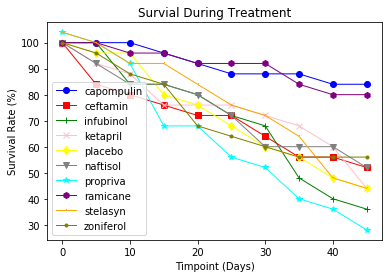

In [9]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
survival_rate = ((grouped["Mouse ID"].count())/25)*100
survival_rate

#creating pandas series for with survival rate information for each drug
capompulin_rate= survival_rate.loc['Capomulin',:].values
ceftamin_rate =survival_rate.loc['Ceftamin',:].values
infubinol_rate =survival_rate.loc['Infubinol',:].values
ketapril_rate =survival_rate.loc['Ketapril',:].values
naftisol_rate =survival_rate.loc['Naftisol',:].values
placebo_rate =survival_rate.loc['Placebo',:].values
propriva_rate=survival_rate.loc['Propriva',:].values
ramicane_rate=survival_rate.loc['Ramicane',:].values
stelasyn_rate=survival_rate.loc['Stelasyn',:].values
zoniferol_rate=survival_rate.loc['Zoniferol',:].values

#ploting info on line chart
plt.plot(x_axis, capompulin_rate, linewidth=1, marker="o", color="blue", label="capompulin" )
plt.plot(x_axis, ceftamin_rate, linewidth=1, marker="s", color="red" , label="ceftamin")
plt.plot(x_axis, infubinol_rate, linewidth=1, marker="+", color="green" , label="infubinol")
plt.plot(x_axis, ketapril_rate, linewidth=1, marker="x", color="pink" , label="ketapril")
plt.plot(x_axis, placebo_rate, linewidth=1, marker="d", color="yellow", label="placebo")
plt.plot(x_axis, naftisol_rate, linewidth=1, marker="v", color="gray" , label="naftisol")
plt.plot(x_axis, propriva_rate, linewidth=1, marker="*", color="cyan",label="propriva" )
plt.plot(x_axis, ramicane_rate, linewidth=1, marker="h", color="purple" ,label="ramicane")
plt.plot(x_axis, stelasyn_rate, linewidth=1, marker=",", color="orange" ,label="stelasyn")
plt.plot(x_axis, zoniferol_rate, linewidth=1, marker=".", color="olive" ,label="zoniferol")

plt.xlabel("Timpoint (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survial During Treatment")

plt.legend(loc="best")

plt.show() 


In [10]:
time_drug_mean_df.index

MultiIndex(levels=[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=['Drug', 'Timepoint'])

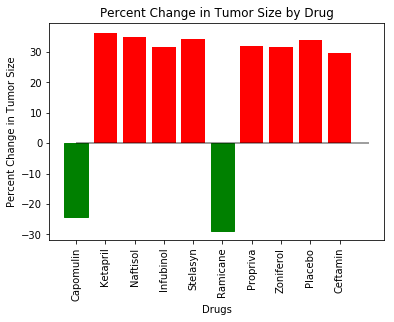

In [14]:
#calculating percent change

tumor_change=[]
for medicine in medicine_array:
    change=(round((((time_drug_mean_df.loc[medicine].loc[45]) -(time_drug_mean_df.loc[medicine].loc[0]))/(time_drug_mean_df.loc[medicine].loc[45])*100),2))
    #print(type(change))
    #print(change[0])
    tumor_change.append(change[0])
#print(tumor_change)
#tumor_change2 = tumor_change[0]
tumor_change

#creaing bar chart
x_axis = np.arange(len(tumor_change))
#tick_locations

barlist=plt.bar(x_axis, tumor_change, align="center", color='r')
barlist[0].set_color('g')
barlist[5].set_color('g')

#tick_locations = [value+0.4 for value in x_axis]
plt.xticks(x_axis, medicine_array, rotation="vertical")



# Give our chart some labels and a tile
plt.title("Percent Change in Tumor Size by Drug")
plt.xlabel("Drugs")
plt.ylabel("Percent Change in Tumor Size")

plt.hlines(0, 0, 10, alpha=0.5)



plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'head'